In [339]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_excel('D:\Thực tập nghề nghiệp\DA_Khách hàng rời bỏ dịch vụ\Customer_Churn_TXL2.xlsx')
df.head()

<>:8: SyntaxWarning: invalid escape sequence '\T'
<>:8: SyntaxWarning: invalid escape sequence '\T'
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18536\2582750318.py:8: SyntaxWarning: invalid escape sequence '\T'
  df = pd.read_excel('D:\Thực tập nghề nghiệp\DA_Khách hàng rời bỏ dịch vụ\Customer_Churn_TXL2.xlsx')


,Churn,tenure,InternetService,OnlineSecurity,TechSupport,Contract,PaymentMethod
0,0,1,0,0,0,0,2
1,0,34,0,2,0,1,3
2,1,2,0,2,0,0,3
3,0,45,0,2,2,1,0
4,1,2,1,0,0,0,2


In [340]:
# Chia dữ liệu thành features (X) và target (y)
X = df.drop(['Churn'], axis=1)  # Loại bỏ cột customerID và cột target 'Churn'
y = df['Churn']

In [341]:
# Chia bộ dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [352]:
# Khởi tạo mô hình KNN
knn_model = KNeighborsClassifier(n_neighbors= 113, weights = 'uniform', metric = 'manhattan')

# Huấn luyện mô hình trên tập huấn luyện
knn_model.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=113)

In [353]:
# Dự đoán trên tập kiểm tra
y_pred = knn_model.predict(X_test)

In [354]:
# Đánh giá hiệu suất của mô hình
print('MÔ HÌNH K-Nearest Neighbors":')
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy *100:.2f}' ' %')

# In ra confusion matrix và báo cáo classification
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

MÔ HÌNH K-Nearest Neighbors":
Accuracy: 79.79 %

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1558
           1       0.65      0.50      0.57       555

    accuracy                           0.80      2113
   macro avg       0.74      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113


Confusion Matrix:
[[1408  150]
 [ 277  278]]


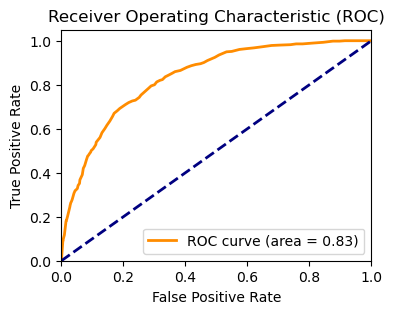

In [355]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
X_test = X_test.astype(int)
# Dự đoán xác suất và tính toán ROC
y_scores = knn_model.predict_proba(X_test)[:, 1]  # Lấy xác suất của lớp positive
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Vẽ đồ thị ROC
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()